In [1]:
from enum import Enum
from gbgp import *

In [2]:
class Terms(Enum):
    Var = 1
    Plus = 2
    Times = 3
    LeftParenthesis = 4
    RightParenthesis = 5
    Expr = 6
    Term = 7
    Factor = 8


varTerm = Terminal(Terms.Var.value, "var", ["x", "y", "1"])
plusTerm = Terminal(Terms.Plus.value, "Plus", ["+"])
timesTerm = Terminal(Terms.Times.value, "Times", ["*"])
leftParenthesisTerm = Terminal(Terms.LeftParenthesis.value, "LeftParenthesis", ["("])
rightParenthesisTerm = Terminal(Terms.RightParenthesis.value, "RightParenthesis", [")"])

exprNonTerm = NonTerminal(Terms.Expr.value, "EXPR")
termNonTerm = NonTerminal(Terms.Term.value, "TERM")
factorNonTerm = NonTerminal(Terms.Factor.value, "FACTOR")

rule1 = ProductionRule(exprNonTerm,
                       [
                           ProductionElement(exprNonTerm),
                           ProductionElement(plusTerm),
                           ProductionElement(termNonTerm)
                       ])
rule2 = ProductionRule(exprNonTerm, [ProductionElement(termNonTerm)])
rule3 = ProductionRule(termNonTerm,
                       [
                           ProductionElement(termNonTerm),
                           ProductionElement(timesTerm),
                           ProductionElement(factorNonTerm)
                       ])
rule4 = ProductionRule(termNonTerm, [ProductionElement(factorNonTerm)])
rule5 = ProductionRule(factorNonTerm,
                       [
                           ProductionElement(leftParenthesisTerm),
                           ProductionElement(exprNonTerm),
                           ProductionElement(rightParenthesisTerm)
                       ])
rule6 = ProductionRule(factorNonTerm, [ProductionElement(varTerm)])

grammar = Grammar([rule1, rule2, rule3, rule4, rule5, rule6])

In [3]:
tree = SyntaxTree(
    TreeNode(
        rule2,
        exprNonTerm,
        [
            TreeNode(
                rule3,
                termNonTerm,
                [
                    TreeNode(
                        rule4,
                        termNonTerm,
                        [
                            TreeNode(
                                rule6,
                                factorNonTerm,
                                [
                                    TreeNode(varTerm, "a")
                                ])
                        ]),
                    TreeNode(timesTerm, "*"),
                    TreeNode(
                        rule5,
                        factorNonTerm,
                        [
                            TreeNode(leftParenthesisTerm, "("),
                            TreeNode(
                                rule2,
                                exprNonTerm,
                                [
                                    TreeNode(
                                        rule4,
                                        termNonTerm,
                                        [
                                            TreeNode(
                                                rule6,
                                                factorNonTerm,
                                                [
                                                    TreeNode(varTerm, "b")
                                                ])
                                        ])
                                ]),
                            TreeNode(rightParenthesisTerm, ")")
                        ])
                ])
        ])
)

In [4]:
graph = tree.ToGraph()

In [5]:
nodes = graph.GetNodeIndexes()
edges = graph.GetEdges()
labels = graph.GetLabels()

In [9]:
labels

{0: 'EXPR',
 1: 'TERM',
 2: 'TERM',
 3: 'FACTOR',
 4: 'var [a]',
 5: 'Times [*]',
 6: 'FACTOR',
 7: 'LeftParenthesis [(]',
 8: 'EXPR',
 9: 'TERM',
 10: 'FACTOR',
 11: 'var [b]',
 12: 'RightParenthesis [)]'}

In [10]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout

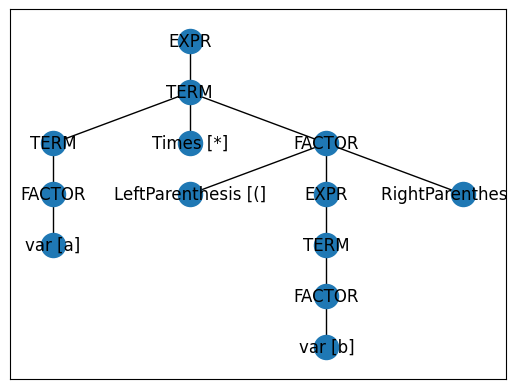

In [11]:
g = nx.Graph()
g.add_nodes_from(nodes)
g.add_edges_from(edges)
pos = graphviz_layout(g, prog="dot")

nx.draw_networkx_nodes(g, pos)
nx.draw_networkx_edges(g, pos)
nx.draw_networkx_labels(g, pos, labels)
plt.show()